In [53]:
import matplotlib.pyplot as plt
from sympy.plotting import plot as symplot
import numpy as np
import sympy as sym
import math
sym.init_printing()
import pandas as pd
from scipy import stats

In [54]:
def materials():
    """
    Contains a list of materials used for strength computation with exodus
    module. Available properties are

    Meta properties
    ---------------
    name : str
        Name of the material
    altname : str
        Alternative name
    source : str
        Data source
    via : str
        Where this data has been used

    Byerlee's law
    -------------
    f_f_e : float
        Friction coefficient for extension
    f_f_c : float
        Friction coefficient for compression
    f_p : float
        Pore fluid factor
    rho_b : float
        Bulkd density of the rock / kg/m3

    Dislocation creep
    -----------------
    a_p : float
        Preexponential scaling factor / Pa^(-n)/s
    n : float
        Power law exponent
    q_p : float
        Activation energy / J/mol

    Diffusion creep
    ---------------
    a_f : float
        Preexponential scaling factor / 1/Pa/s
    q_f : float
        Activation energy / J/mol
    a : float
        Grain size / m
    m : float
        Grain size exponent

    Dorn's law creep
    ----------------
    sigma_d : float
        Dorn's law stress / Pa
    q_d : float
        Dorn's law activation energy / J/mol
    a_d : float
        Dorn's law strain rate
    """
    """
    Template

    r.append(dict(name='',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=,  # Bulk density
                    # Dislocation creep
                    a_p=,   # Preexponential scaling factor / Pa^(-n)/s
                    n=,         # Power law exponent
                    q_p=,   # Activation energy J/mol
                    # Diffusion creep
                    a_f=None,      # Preexp. scaling factor / 1/Pa/s
                    q_f=None,      # Activation energy / J/mol
                    a=None,        # Grain size / m
                    m=None,        # Grain size exponent
                    # Dorn's law properties
                    sigma_d=None, # Dorn's law stress
                    q_d=None,     # Dorn's law activation energy
                    a_d=None))    # Dorn's law strain rate / 1/s
    """
    def AGPa(A,n):
        A = float(A)
        n = float(n)
        return A*10.0**(-1.0*n*9.0)

    r = list()
    r.append(dict(name='olivine',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=3300.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(4e15,3.0),   # Preexponential scaling factor / Pa^(-n)/s
                    n=3.0,         # Power law exponent
                    q_p=540.0e3))  # Activation energy J/mol
    r.append(dict(name='olivine_wet',
                    altname='',
                    source='Jackson (2002)',
                    source_disloc='Jackson (2002)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=3300.0,  # Bulk density
                    # Dislocation creep
                    a_p=5.5e-25,   # Preexponential scaling factor / Pa^(-n)/s
                    n=4.48,         # Power law exponent
                    q_p=498.0e3))  # Activation energy J/mol
    r.append(dict(name='diabase',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2950.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(3.2e6,3.4),   # Preexponential scaling factor / Pa^(-n)/s
                    n=3.4,         # Power law exponent
                    q_p=260.0e3))  # Activation energy J/mol
    r.append(dict(name='quartz_diorite',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2900.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(2e4,2.4),   # Preexponential scaling factor / Pa^(-n)/s
                    n=2.4,         # Power law exponent
                    q_p=219.0e3))  # Activation energy J/mol
    r.append(dict(name='anorthosite',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2800.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(1.3e6,3.2),   # Preexponential scaling factor / Pa^(-n)/s
                    n=3.2,         # Power law exponent
                    q_p=238.0e3))  # Activation energy J/mol
    r.append(dict(name='albite_rock',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2600.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(1.3e6,3.9),   # Preexponential scaling factor / Pa^(-n)/s
                    n=3.9,         # Power law exponent
                    q_p=234.0e3))  # Activation energy J/mol
    r.append(dict(name='quartzite_wet',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2650.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(2e3, 2.3),   # Preexponential scaling factor / Pa^(-n)/s
                    n=2.3,         # Power law exponent
                    q_p=154.0e3))  # Activation energy J/mol
    r.append(dict(name='quartzite',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2650.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(100,2.4),   # Preexponential scaling factor / Pa^(-n)/s
                    n=2.4,         # Power law exponent
                    q_p=156.0e3))  # Activation energy J/mol
    r.append(dict(name='granite_wet',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2650.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(100,2.4),   # Preexponential scaling factor / Pa^(-n)/s
                    n=2.4,         # Power law exponent
                    q_p=137.0e3))  # Activation energy J/mol
    r.append(dict(name='granite',
                    altname='',
                    source='Ranalli and Murpy (1987)',
                    source_disloc='Ranalli and Murpy (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='Ranalli and Murpy (1987)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2650.0,  # Bulk density
                    # Dislocation creep
                    a_p=AGPa(5,3.2),     # Preexponential scaling factor / Pa^(-n)/s
                    n=3.2,         # Power law exponent
                    q_p=123.0e3))  # Activation energy J/mol
    r.append(dict(name='olivine_dry',
                    altname='Mantle',
                    source='Goetze and Evans (1979)',
                    source_disloc='Goetze and Evans (1979)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sippel et al. (2016)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=3300.0,  # Bulk density
                    # Dislocation creep
                    a_p=7.0e-14,   # Preexponential scaling factor / Pa^(-n)/s
                    n=3.0,         # Power law exponent
                    q_p=510.0e3,   # Activation energy J/mol
                    # Dorn's law properties
                    sigma_d=8.5e9, # Dorn's law stress
                    q_d=535e3,     # Dorn's law activation energy
                    a_d=5.7e11))   # Dorn's law strain rate / 1/s
    r.append(dict(name='mafic_granulite',
                    altname='Mafic granulites',
                    source='Wilks and Carter (1990)',
                    source_disloc='Wilks and Carter (1990)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sippel et al. (2016)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=3050.0,  # Bulk density
                    # Dislocation creep
                    a_p=8.83e-22,  # Preexponential scaling factor / Pa^(-n)/s
                    n=4.2,         # Power law exponent
                    q_p=445.0e3))  # Activation energy J/mol
    r.append(dict(name='diabase_dry',
                    altname='Gabbroid rocks',
                    source='Carter and Tsenn (1987)',
                    source_disloc='Carter and Tsenn (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sippel et al. (2016)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2920.0,  # Bulk density
                    # Dislocation creep
                    a_p=6.31e-20,  # Preexponential scaling factor / Pa^(-n)/s
                    n=3.05,        # Power law exponent
                    q_p=276.0e3))  # Activation energy J/mol
    r.append(dict(name='granite_dry',
                    altname='Meta-sedimentary rocks',
                    source='Carter and Tsenn (1987)',
                    source_disloc='Carter and Tsenn (1987)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sippel et al. (2016)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2750.0,  # Bulk density
                    # Dislocation creep
                    a_p=3.16e-26,  # Preexponential scaling factor / Pa^(-n)/s
                    n=3.3,         # Power law exponent
                    q_p=186e3))    # Activation energy J/mol
    r.append(dict(name='quartzite_dry',
                    altname='Sediments',
                    source='Burov et al. (1998)',
                    source_disloc='Burov et al. (1998)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sippel et al. (2016), Carter and Tsenn (1987)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2600,    # Bulk density
                    # Dislocation creep
                    a_p=5.0e-12,   # Preexponential scaling factor / Pa^(-n)/s
                    n=3.0,         # Power law exponent
                    q_p=190e3))    # Activation energy J/mol
    r.append(dict(name='diorite_dry',
                    altname='Meta-igneous rocks',
                    source='Burov et al. (1998)',
                    source_disloc='Burov et al. (1998)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sippel et al. (2016)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,      # Pore fluid factor
                    rho_b=2800,  # Bulk density
                    # Dislocation creep
                    a_p=5.2e-18,     # Preexponential scaling factor / Pa^(-n)/s
                    n=2.4,         # Power law exponent
                    q_p=219e3))    # Activation energy J/mol
    r.append(dict(name='peridotite_dry',
                    altname='Mantle lithosphere of slab and shield, \
                             dry_olivine',
                    source='Hirth and Kohlstedt (1996), Kameyama et al. (1999)',
                    source_disloc='Hirth and Kohlstedt (1996)',
                    source_diff='Kameyama et al. (1999)',
                    source_dorn='Kameyama et al. (1999)',
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=3280.0,     # Bulk density
                    # Dislocation creep
                    a_p=5.011e-17,    # Preexponential scaling factor, -16.3
                    n=3.5,            # Power law exponent
                    q_p=535e3,        # Activation energy
                    # Diffusion creep
                    a_f=2.570e-11,    # Preexp. scaling factor / 1/Pa/s, -10.59
                    q_f=300e3,        # Activation energy / J/mol
                    a=0.1e-3,         # Grain size / m
                    m=2.5,            # Grain size exponent
                    # Dorn's law
                    sigma_d=8.5e9,    # Dorn's law stress / Pa
                    q_d=535e3,        # Dorn's law activation energy / J/mol
                    a_d=5.754e11))     # Dorn's law strain rate
    r.append(dict(name='peridotite_dry_SA',
                    altname='Mantle lithosphere of South America, not shield',
                    source='Hirth and Kohlstedt (1996), Kameyama et al. (1999)',
                    source_disloc='Hirth and Kohlstedt (1996)',
                    source_diff='Kameyama et al. (1999)',
                    source_dorn='Kameyama et al. (1999)',
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=3280.0,     # Bulk density
                    # Dislocation creep
                    a_p=5.002e-15,      # Preexponential scaling factor
                    n=3.5,            # Power law exponent
                    q_p=515e3,        # Activation energy
                    # Diffusion creep
                    a_f=2.570e-11,     # Preexp. scaling factor / 1/Pa/s
                    q_f=300e3,        # Activation energy / J/mol
                    a=0.1e-3,         # Grain size / m
                    m=2.5,            # Grain size exponent
                    # Dorn's law
                    sigma_d=8.5e9,    # Dorn's law stress / Pa
                    q_d=535e3,        # Dorn's law activation energy / J/mol
                    a_d=5.754e11))     # Dorn's law strain rate
    r.append(dict(name='peridotite_dry_asthenosphere',
    # Difference to peridotite_dry_SA is density
                    altname='Mantle asthenosphere',
                    source='Hirth and Kohlstedt (1996), Kameyama et al. (1999)',
                    source_disloc='Hirth and Kohlstedt (1996)',
                    source_diff='Kameyama et al. (1999)',
                    source_dorn='Kameyama et al. (1999)',
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=3300.0,     # Bulk density
                    # Dislocation creep
                    a_p=5.012e-15,      # Preexponential scaling factor
                    n=3.5,            # Power law exponent
                    q_p=515e3,        # Activation energy
                    # Diffusion creep
                    a_f=2.570e-11,     # Preexp. scaling factor / 1/Pa/s
                    q_f=300e3,        # Activation energy / J/mol
                    a=0.1e-3,         # Grain size / m
                    m=2.5,            # Grain size exponent
                    # Dorn's law
                    sigma_d=8.5e9,    # Dorn's law stress / Pa
                    q_d=535e3,        # Dorn's law activation energy / J/mol
                    a_d=5.754e11))     # Dorn's law strain rate
    r.append(dict(name='quartzite_wet_2650',
                    altname='sediments',
                    source='Gleason and Tullis (1995)',
                    source_disloc='Gleason and Tullis (1995)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=2650.0,     # Bulk density
                    # Dislocation creep
                    a_p=1e-28,        # Preexponential scaling factor
                    n=4.0,            # Power law exponent
                    q_p=223e3))       # Activation energy
    r.append(dict(name='quartzite_wet_2700',
                    altname='Uppermost crust continent',
                    source='Gleason and Tullis (1995)',
                    source_disloc='Gleason and Tullis (1995)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=2700.0,     # Bulk density
                    # Dislocation creep
                    a_p=1e-28,        # Preexponential scaling factor
                    n=4.0,            # Power law exponent
                    q_p=223e3))       # Activation energy
    r.append(dict(name='quartzite_wet_weak',
                    altname='Upper crust continent',
                    source='Gleason and Tullis (1995)',
                    source_disloc='Gleason and Tullis (1995)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=2800.0,     # Bulk density
                    # Dislocation creep
                    a_p=1e-27,        # Preexponential scaling factor
                    n=4.0,            # Power law exponent
                    q_p=223e3))       # Activation energy
    r.append(dict(name='plagioclase_wet',
    # Note: this one doesn't fit with the model parameters given in drezina.inp!
                    altname='Granulite, mafic crust continent',
                    source='Rybacki and Dresen (2000)',
                    source_disloc='Rybacki and Dresen (2000)',
                    source_diff=None,
                    source_dorn=None,
                    via='Sobolev et al. (2006)',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=2950.0,     # Bulk density
                    # Dislocation creep
                    a_p=3.981e-16,      # Preexponential scaling factor
                    n=3.0,            # Power law exponent
                    q_p=356e3))       # Activation energy
    r.append(dict(name='granulite_dry',
                    altname='Pikwetonian granulite',
                    source='UNKNOWN',
                    source_disloc='UNKNOWN',
                    source_diff=None,
                    source_dorn=None,
                    via='Sobolev et al. (2006) Drezina.inp',
                    # Byerlee's law
                    f_f_e=0.75,    # Friction coefficient extension
                    f_f_c=2.0,     # Friction coefficient compression
                    f_p=0.35,         # Pore fluid factor
                    rho_b=2950,       # Bulk density
                    # Dislocation creep
                    a_p=3.2e-21,      # Preexponential scaling factor
                    n=4.2,            # Power law exponent
                    q_p=445.0e3))     # Activation energy
    return r

In [55]:
def calc_vis_derivative_geotherm(func,T_,n_,A_,E_,strain_rate_,R_):
    out=np.zeros_like(T_)
    for i in range(len(T_)):
        #out.append(func.evalf(subs={n:n_,strain_rate:strain_rate_,A:A_,T:T_[i],E:E_,R:R_}))
        out[i]=func.evalf(subs={n:n_,strain_rate:strain_rate_,A:A_,T:T_[i],E:E_,R:R_})
    return out
def calc_derivative_geotherm(func,T_,n_,A_,E_,strain_rate_,R_):
#calc_derivative_geotherm(Dvis_DA,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
    out=np.zeros_like(T_)
    for i in range(len(T_)):
        #out.append(func.evalf(subs={n:n_,strain_rate:strain_rate_,A:A_,T:T_[i],E:E_,R:R_}))
        out[i]=func.evalf(subs={n:n_,strain_rate:strain_rate_,A:A_,T:T_[i],E:E_,R:R_})
    return out

def error_percentage2value(value,error_per):
    return error_per*value*1e-2

In [56]:
f_e = sym.symbols('f_e',real=True)
err_f_e = 0.1
f_c = sym.symbols('f_c',real=True)
err_f_c = 0.1
f_s = sym.symbols('f_s',real=True)
err_f_s = 0.1
f_p = sym.symbols('f_p',real=True)
err_f_p = 0.1
g = sym.symbols('g',real=True)
z = sym.symbols('z',real=True)


rho = sym.symbols('rho',real=True)
A = sym.symbols('A',real=True)
n = sym.symbols('n',real=True)
E = sym.symbols('H',real=True)
strain_rate=sym.symbols('epsilon',real=True)
T = sym.symbols('T',real=True) # temperature
P = sym.symbols('P',real=True) #3719912884 #6e9 # #Pressure
R = sym.symbols('R',real=True) #8.314472#  #8.314472
pi= sym.symbols('pi') #3.1415926
sigma_byerlee=sym.symbols('sigma_b',real=True)

In [57]:
symbs = f_e,f_c,f_s,f_p,g,z,rho,A,n,E,T,P,strain_rate = sym.symbols('f_e f_c f_s f_p g z rho A n E T P epsilon',real=True) #3719912884 #6e9 # #Pressure
#R = sym.symbols('R',real=True) #8.314472#  #8.314472
#pi= sym.symbols('pi') #3.1415926

In [58]:
#funcs = 

In [59]:
sigma_byerlee = f_c*rho*g*z*(1-f_p)
sigma_ductile = (strain_rate/A)**(1/n)*sym.exp(E/(n*R*T))
viscosity = (2**((1-n)/n))/(3**((1+n)/(n*2)))*(A**(-1/n))*(strain_rate**((1/n)-1))*sym.exp(E/(n*R*T))


In [60]:
sigma_byerlee.evalf()

In [61]:
sigma_ductile.evalf()

In [62]:
viscosity.evalf()

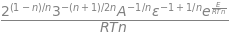

In [63]:
sym.diff(viscosity,E)

In [64]:
#################3
litmod_ref = np.loadtxt('./post_processing_output_DMM_Afonso.dat')
#Dvis_Dstrain.evalf(subs={n:1,strain_rate:1.0e-15,A:200,T:1000,P:1000,E:274,R:8.314472})

In [65]:
mat_dbase = sorted(materials(), key=lambda k:k['name'] )
mat=mat_dbase['name'=='quartz']

In [66]:
print(len(mat_dbase))

24


In [67]:
# get all the available
name_all=[]
a_p_all=[]
n_all=[]
q_p_all=[]
for i in range(len(mat_dbase)):
    mat=mat_dbase[i]
    name_all.append(mat['name'])
    n_all.append(mat['n'])
    a_p_all.append(mat['a_p'])
    q_p_all.append(mat['q_p'])

In [68]:
'''
n_in = 3
A_in = 4.0e-12
E_in = 5.40e5
S_r_in = 1.0e-15
'''
n_in = mat['n']
A_in = mat['a_p']
E_in = mat['q_p']
S_r_in = 1.0e-15

A_error=1
E_error=1
n_error=1
S_r_error=5

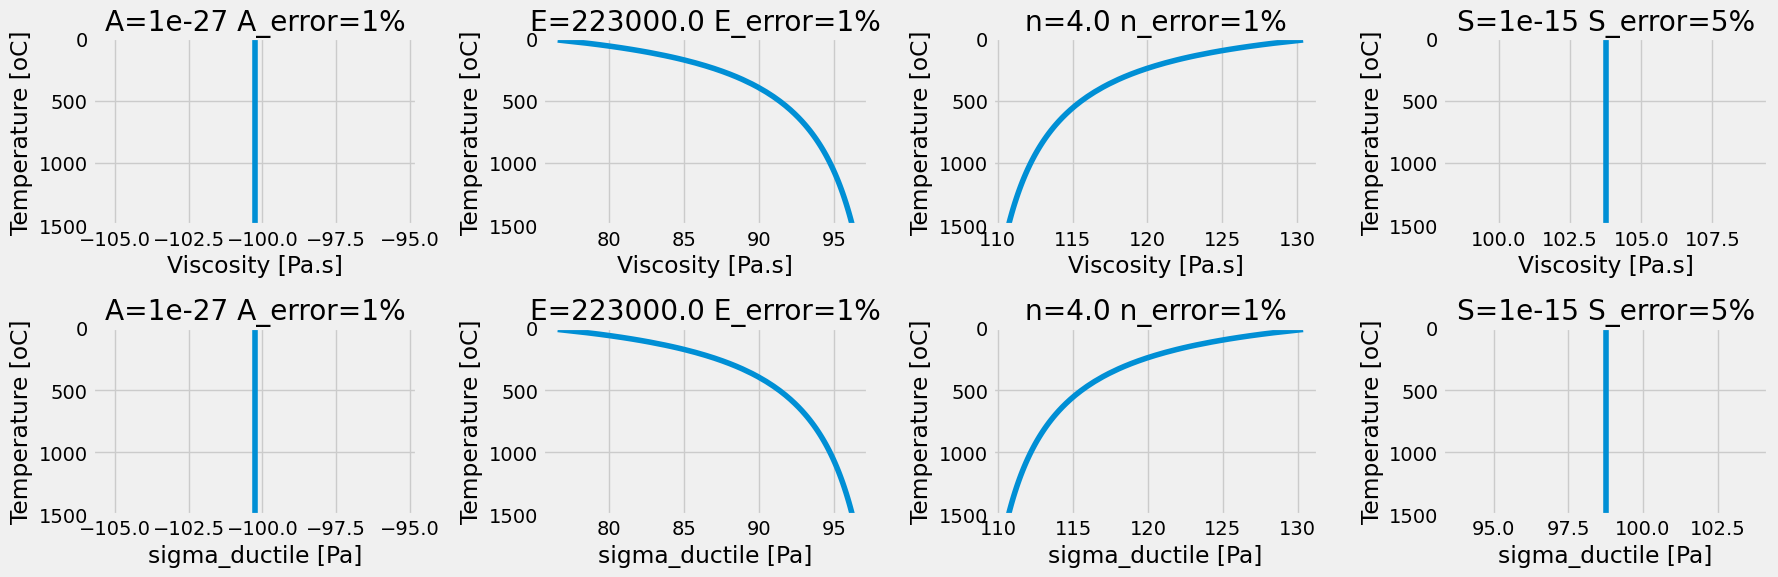

In [69]:

fig,ax= plt.subplots(nrows=2, ncols=4, layout=None,figsize=(18,6))
vis = calc_derivative_geotherm(viscosity,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
## A

Dvis_DA=viscosity.diff(A)
Dvis_DA.evalf()
deri= calc_derivative_geotherm(Dvis_DA,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(deri[:]*error_percentage2value(A_in,A_error)-vis[:])*1e2/vis[:]
A_plot=ax[0][0].plot(error,litmod_ref[:,2])
ax[0][0].set_title('A='+str(A_in)+ ' A_error='+str(A_error)+'%')
## E

Dvis_DE=viscosity.diff(E)
Dvis_DE.evalf()
deri= calc_derivative_geotherm(Dvis_DE,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(vis[:]-deri[:]*error_percentage2value(E_in,E_error))*1e2/vis[:]
E_plot=ax[0][1].plot(error,litmod_ref[:,2])
ax[0][1].set_title('E='+str(E_in)+ ' E_error='+str(E_error)+'%')

## n

Dvis_Dn=viscosity.diff(n)
Dvis_Dn.evalf()
deri= calc_derivative_geotherm(Dvis_Dn,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(vis[:]-deri[:]*error_percentage2value(n_in,n_error))*1e2/vis[:]
#error=(deri[:]*error_percentage2value(n_error,n_in)-vis[:])*1e2/vis[:]
n_plot=ax[0][2].plot(error,litmod_ref[:,2])
ax[0][2].set_title('n='+str(n_in)+ ' n_error='+str(n_error)+'%')

## strain_rate

Dvis_De=viscosity.diff(strain_rate)
Dvis_De.evalf()
deri= calc_derivative_geotherm(Dvis_De,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(vis[:]-deri[:]*error_percentage2value(S_r_in,S_r_error))*1e2/vis[:]
S_plot=ax[0][3].plot(error,litmod_ref[:,2])
ax[0][3].set_title('S='+str(S_r_in)+ ' S_error='+str(S_r_error)+'%')


    
    
sigma = calc_derivative_geotherm(sigma_ductile,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
#sigma=np.log10(sigma)
## A

Dsigma_DA=sigma_ductile.diff(A)
Dsigma_DA.evalf()
deri= calc_derivative_geotherm(Dsigma_DA,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)

error=(deri[:]*error_percentage2value(A_in,A_error)-sigma[:])*1e2/sigma[:]
A_plot=ax[1][0].plot(error,litmod_ref[:,2])
ax[1][0].set_title('A='+str(A_in)+ ' A_error='+str(A_error)+'%')
## E

Dsigma_DE=sigma_ductile.diff(E)
Dsigma_DE.evalf()
deri= calc_derivative_geotherm(Dsigma_DE,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(sigma[:]-deri[:]*error_percentage2value(E_in,E_error))*1e2/sigma[:]
E_plot=ax[1][1].plot(error,litmod_ref[:,2])
ax[1][1].set_title('E='+str(E_in)+ ' E_error='+str(E_error)+'%')

## n

Dsigma_Dn=sigma_ductile.diff(n)
Dsigma_Dn.evalf()
deri= calc_derivative_geotherm(Dsigma_Dn,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(sigma[:]-deri[:]*error_percentage2value(n_in,n_error))*1e2/sigma[:]
#error=(deri[:]*error_percentage2value(n_error,n_in)-sigma[:])*1e2/sigma[:]
n_plot=ax[1][2].plot(error,litmod_ref[:,2])
ax[1][2].set_title('n='+str(n_in)+ ' n_error='+str(n_error)+'%')

## strain_rate

Dsigma_De=sigma_ductile.diff(strain_rate)
Dsigma_De.evalf()
deri= calc_derivative_geotherm(Dsigma_De,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(sigma[:]-deri[:]*error_percentage2value(S_r_in,S_r_error))*1e2/sigma[:]
S_plot=ax[1][3].plot(error,litmod_ref[:,2])
ax[1][3].set_title('S='+str(S_r_in)+ ' S_error='+str(S_r_error)+'%')

for a in ax[0][:]:
    #a.invert_yaxis()
    a.set_ylabel('Temperature [oC]')
    a.set_xlabel('Viscosity [Pa.s]')
    a.set_ylim((1500,0))

for a in ax[1][:]:
    #a.invert_yaxis()
    a.set_ylabel('Temperature [oC]')
    a.set_xlabel('sigma_ductile [Pa]')
    a.set_ylim((1500,0))
plt.tight_layout()    
   

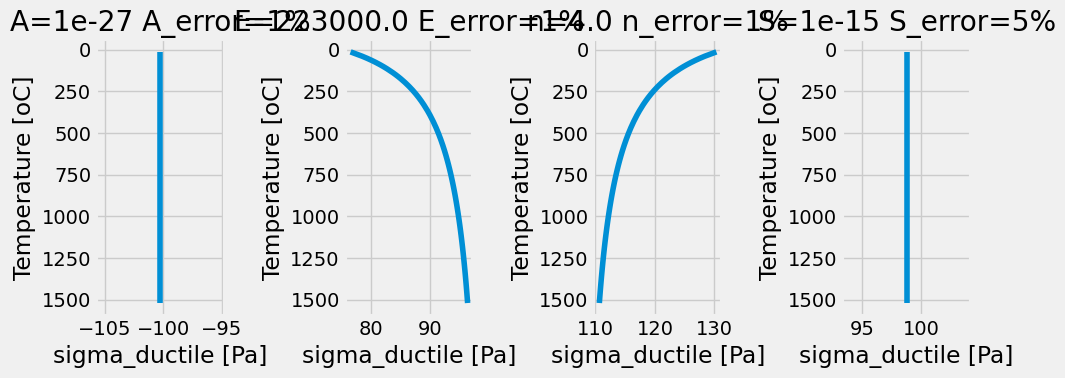

In [70]:
fig,ax= plt.subplots(nrows=1, ncols=4, layout=None,figsize=(10,4))
sigma = calc_derivative_geotherm(sigma_ductile,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
#sigma=np.log10(sigma)
## A
A_error=1
Dsigma_DA=sigma_ductile.diff(A)
Dsigma_DA.evalf()
deri= calc_derivative_geotherm(Dsigma_DA,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)

error=(deri[:]*error_percentage2value(A_in,A_error)-sigma[:])*1e2/sigma[:]
A_plot=ax[0].plot(error,litmod_ref[:,2])
ax[0].set_title('A='+str(A_in)+ ' A_error='+str(A_error)+'%')
## E
E_error=1
Dsigma_DE=sigma_ductile.diff(E)
Dsigma_DE.evalf()
deri= calc_derivative_geotherm(Dsigma_DE,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(sigma[:]-deri[:]*error_percentage2value(E_in,E_error))*1e2/sigma[:]
E_plot=ax[1].plot(error,litmod_ref[:,2])
ax[1].set_title('E='+str(E_in)+ ' E_error='+str(E_error)+'%')

## n
n_error=1
Dsigma_Dn=sigma_ductile.diff(n)
Dsigma_Dn.evalf()
deri= calc_derivative_geotherm(Dsigma_Dn,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(sigma[:]-deri[:]*error_percentage2value(n_in,n_error))*1e2/sigma[:]
#error=(deri[:]*error_percentage2value(n_error,n_in)-sigma[:])*1e2/sigma[:]
n_plot=ax[2].plot(error,litmod_ref[:,2])
ax[2].set_title('n='+str(n_in)+ ' n_error='+str(n_error)+'%')

## strain_rate
S_r_error=5
Dsigma_De=sigma_ductile.diff(strain_rate)
Dsigma_De.evalf()
deri= calc_derivative_geotherm(Dsigma_De,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
error=(sigma[:]-deri[:]*error_percentage2value(S_r_in,S_r_error))*1e2/sigma[:]
S_plot=ax[3].plot(error,litmod_ref[:,2])
ax[3].set_title('S='+str(S_r_in)+ ' S_error='+str(S_r_error)+'%')
for a in ax:
    a.invert_yaxis()
    a.set_ylabel('Temperature [oC]')
    a.set_xlabel('sigma_ductile [Pa]')

plt.tight_layout()    

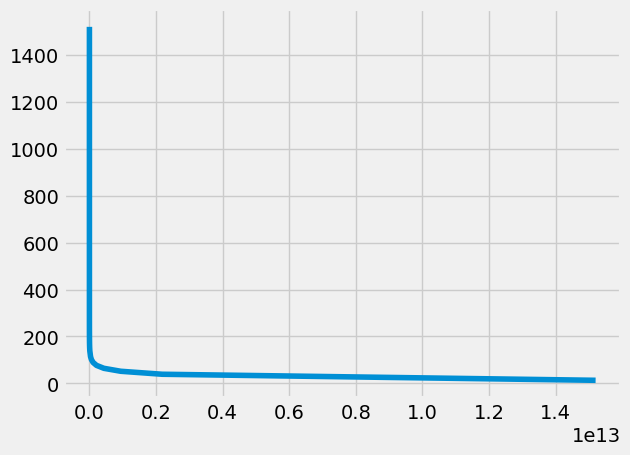

In [71]:
sigma = calc_derivative_geotherm(sigma_ductile,litmod_ref[:,2]+273,n_in,A_in,E_in,S_r_in,8.314472)
plt.plot(sigma,litmod_ref[:,2])

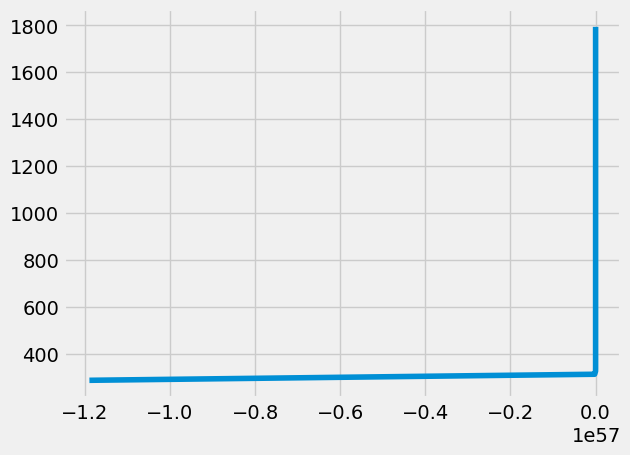

In [72]:
Dvis_DA=viscosity.diff(A)
Dvis_DA.evalf()
deri= calc_vis_derivative_geotherm(Dvis_DA,litmod_ref[:,2]+273,3,4.0e-12,5.40e5,1.0e-15,8.314472)
plt.plot(deri[:],litmod_ref[:,2]+273)
#vis_ = calc_derivative_geotherm(viscosity,litmod_ref[:,3],litmod_ref[:,2]+273,3,4.0e-12,5.40e5,1.0e-15)

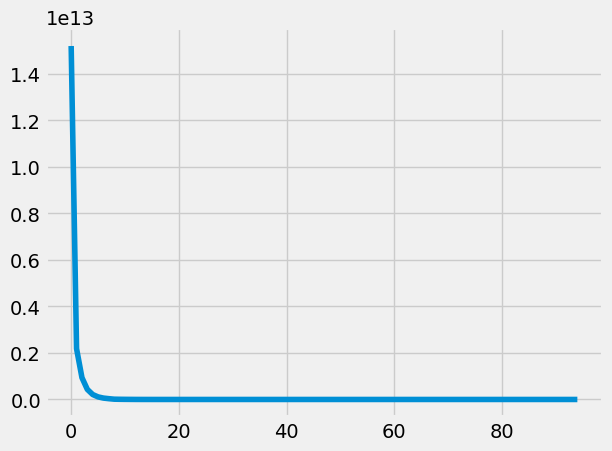

In [73]:
plt.plot(sigma)

/tmp/ipykernel_1556760/946642735.py:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(deri[:]),litmod_ref[:,2]+273)


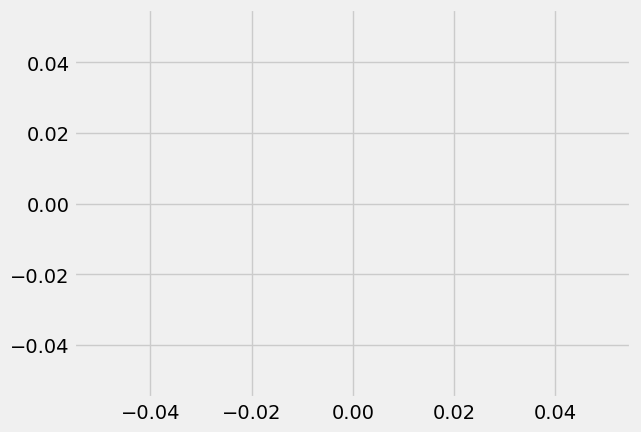

In [74]:
Dvis_Dn=viscosity.diff(n)
Dvis_Dn.evalf()
deri= calc_derivative_geotherm(Dvis_Dn,litmod_ref[:,2]+273,3,4.0e-12,5.40e5,1.0e-15,8.314472)
plt.plot(np.log10(deri[:]),litmod_ref[:,2]+273)

/tmp/ipykernel_1556760/166467087.py:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(deri[:]),litmod_ref[:,2]+273)


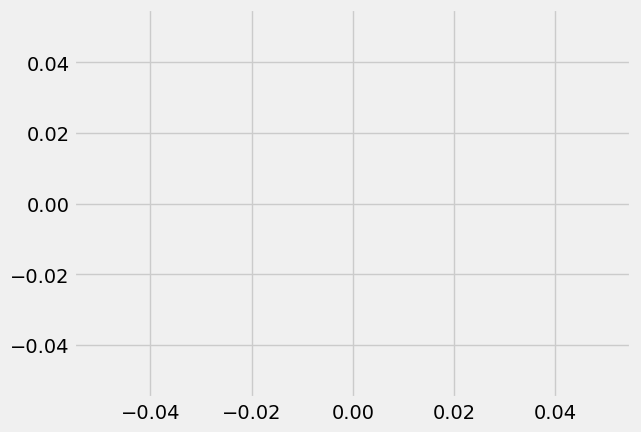

In [75]:
Dvis_Ds=viscosity.diff(strain_rate)
Dvis_Ds.evalf()
deri= calc_derivative_geotherm(Dvis_Ds,litmod_ref[:,2]+273,3,4.0e-12,5.40e5,1.0e-15,8.314472)
plt.plot(np.log10(deri[:]),litmod_ref[:,2]+273)

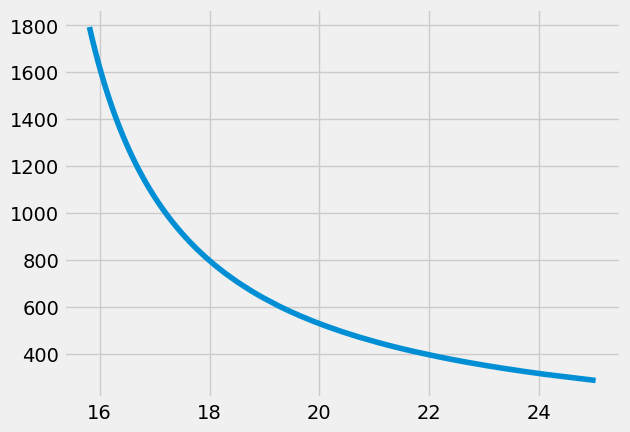

In [76]:
Dvis_Dn=viscosity.diff(n)
Dvis_Dn.evalf()
deri= calc_derivative_geotherm(viscosity,litmod_ref[:,2]+273,9,4.0e-12,5.40e5,1.0e-15,8.314472)
plt.plot(np.log10(deri[:]),litmod_ref[:,2]+273)

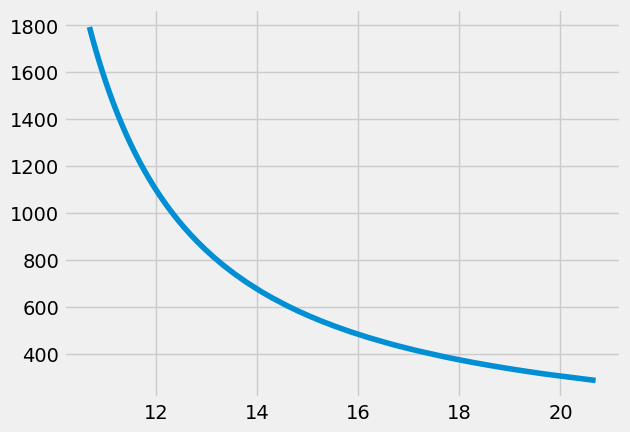

In [77]:
Dvis_DE=viscosity.diff(E)
Dvis_DE.evalf()
deri= calc_derivative_geotherm(Dvis_DE,litmod_ref[:,2]+273,9,4.0e-12,5.40e5,1.0e-15,8.314472)
plt.plot(np.log10(deri[:]),litmod_ref[:,2]+273)

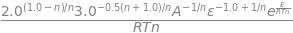

In [78]:
Dvis_DE=viscosity.diff(E)
Dvis_DE.evalf()


In [79]:
viscosity.evalf()